In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
%env LC_ALL=C.UTF-8
%env LANG=C.UTF-8



env: LC_ALL=C.UTF-8
env: LANG=C.UTF-8


In [19]:
!pip install ultralytics
from IPython import display
display.clear_output()

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [3]:
import os
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
!apt-get install unrar -y

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
unrar is already the newest version (1:6.1.5-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.


In [5]:
!unrar x /content/cytologia_model_weights_yolo5n.rar /content


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/cytologia_model_weights_yolo5n.rar

Extracting  /content/cytologia_model_weights_yolo5n.pt                    88%100%  OK 
All OK


In [6]:
import torch
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

trained_model_path = '/content/cytologia_model_weights_yolo5n.pt'
model = YOLO(trained_model_path)

# Define the path to the data configuration file
data_config_path = '/content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/yolov5/data.yaml'

# Verify the model's class names match your custom classes
print("Model Classes:")
print(model.names)  # This should print your 23 custom classes

# Evaluate the model on the test dataset using the correct data configuration
results = model.val(data=data_config_path, split='test')

# Print evaluation metrics
print("Evaluation Results:")
print(results)

Model Classes:
{0: 'B', 1: 'LyB', 2: 'SS', 3: 'PNN', 4: 'PM', 5: 'MoB', 6: 'MO', 7: 'MM', 8: 'MBL', 9: 'M', 10: 'Lysee', 11: 'LZMG', 12: 'BA', 13: 'LY', 14: 'LM', 15: 'LLC', 16: 'LH_lyAct', 17: 'LGL', 18: 'LF', 19: 'LAM3', 20: 'Er', 21: 'EO', 22: 'Thromb'}
Ultralytics 8.3.67 🚀 Python-3.11.11 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv5n summary (fused): 193 layers, 2,507,429 parameters, 0 gradients, 7.1 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 24.5MB/s]
val: Scanning /content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/labels... 685 images, 0 backgrounds, 0 corrupt: 100%|██████████| 685/685 [04:27<00:00,  2.56it/s]


val: New cache created: /content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/labels.cache


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 43/43 [00:13<00:00,  3.14it/s]


                   all        685        690      0.756      0.837      0.825       0.75
                     B         30         30      0.965          1      0.995      0.986
                   LyB         30         30       0.84      0.874      0.938      0.734
                    SS         30         30      0.783      0.964      0.862      0.785
                   PNN         30         30      0.529      0.675      0.648      0.596
                    PM         29         30      0.647      0.833      0.677      0.595
                   MoB         30         30      0.987        0.9      0.972      0.948
                    MO         30         30      0.528        0.6      0.581      0.505
                    MM         29         30      0.877      0.867       0.86      0.802
                   MBL         30         30      0.918          1       0.97      0.939
                     M         30         30      0.878      0.719      0.856      0.594
                 Lyse


image 1/1 /content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/images/36b11457-2.jpg: 640x640 1 PNN, 9.2ms
Speed: 3.2ms preprocess, 9.2ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


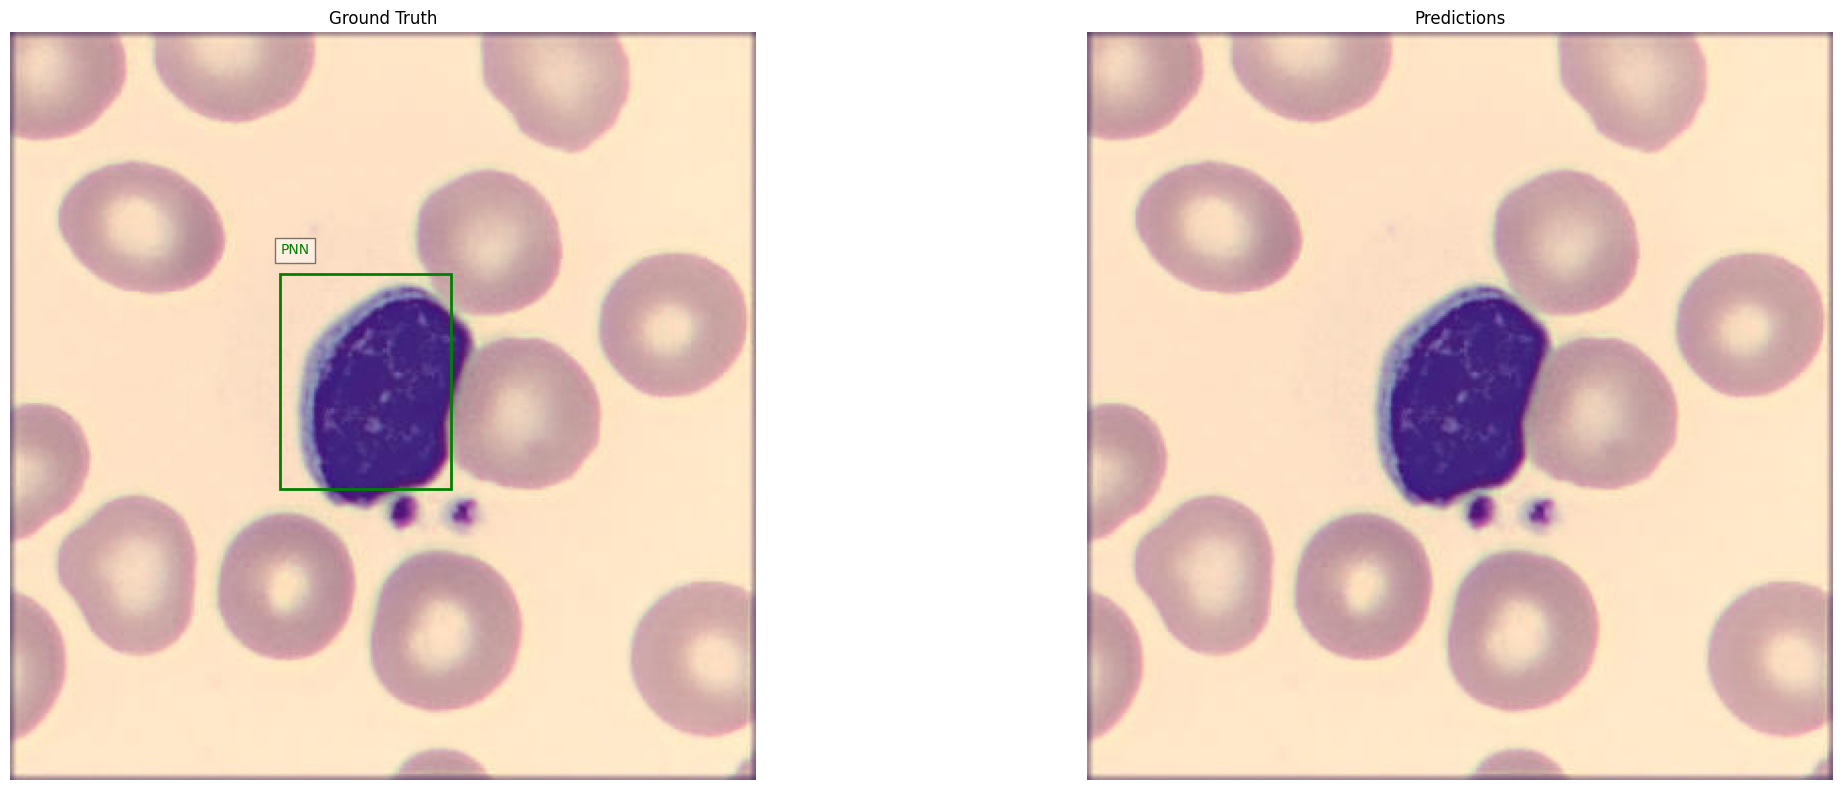


image 1/1 /content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/images/9d5dc230-c.jpg: 640x640 1 PNN, 9.3ms
Speed: 4.5ms preprocess, 9.3ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


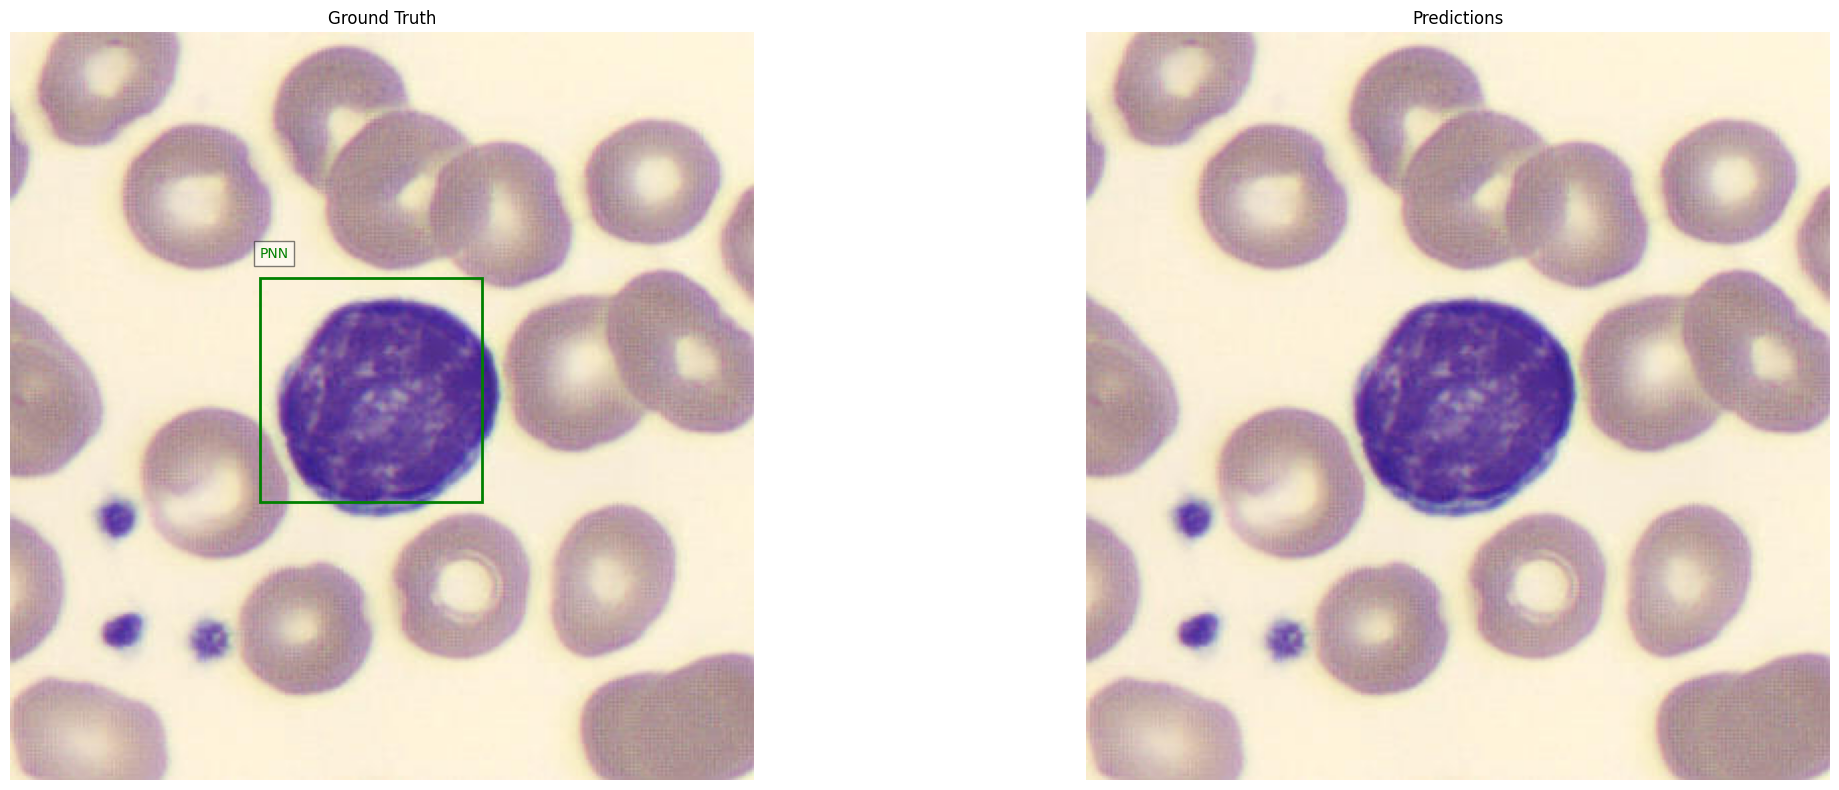


image 1/1 /content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/images/54796fa0-5.jpg: 640x640 1 SS, 10.0ms
Speed: 8.8ms preprocess, 10.0ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


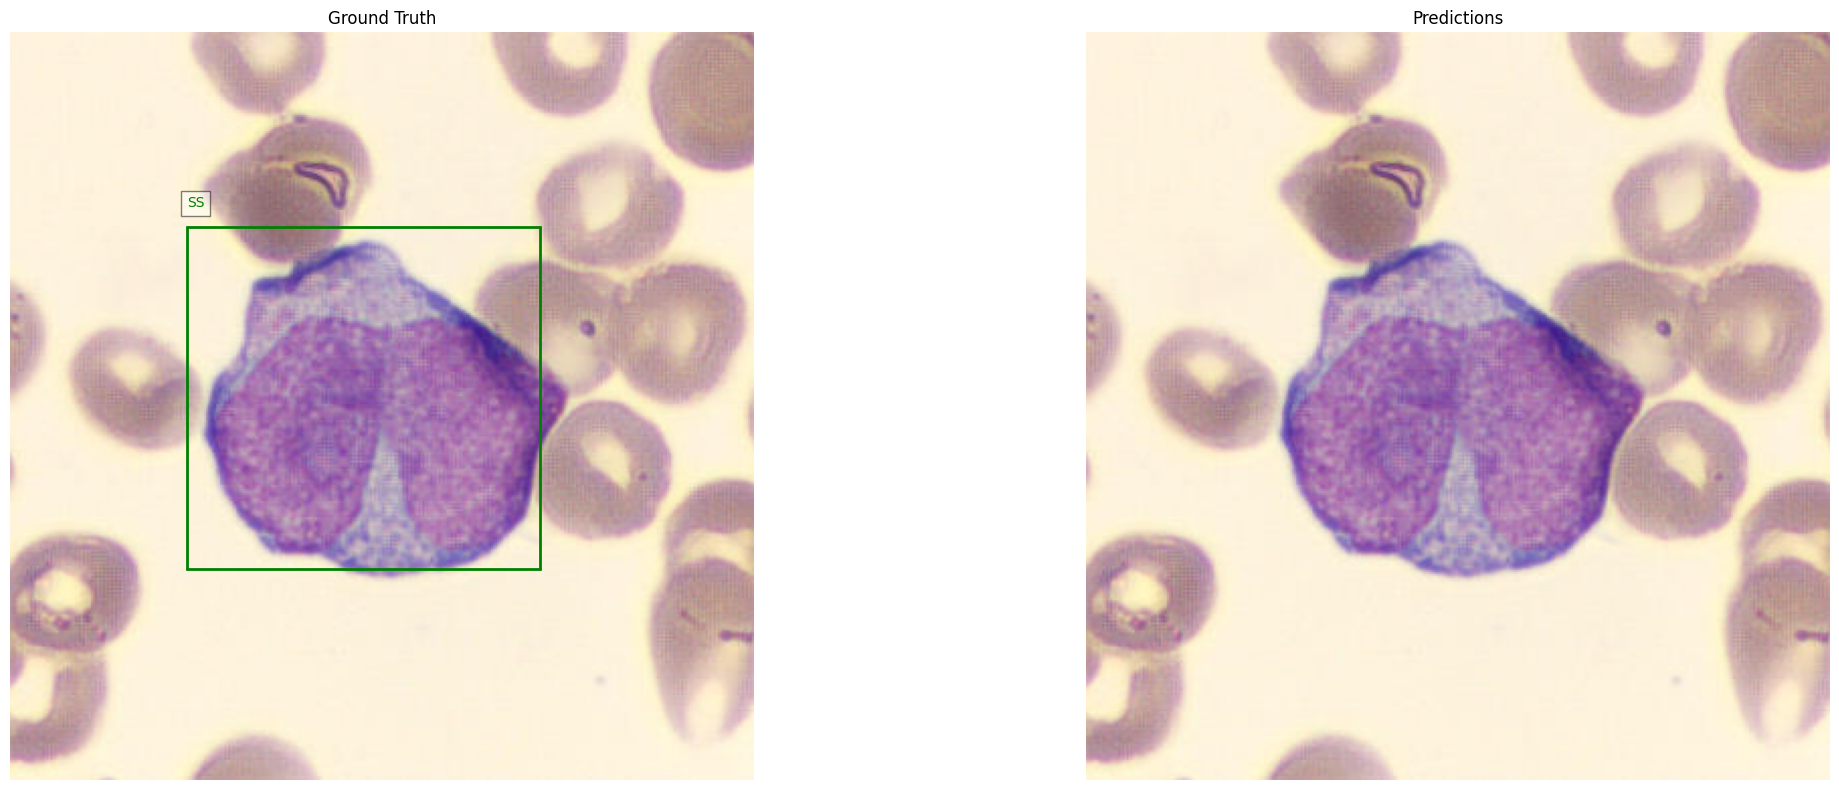


image 1/1 /content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/images/0e2826b8-e.jpg: 640x640 8 BAs, 9.6ms
Speed: 4.7ms preprocess, 9.6ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


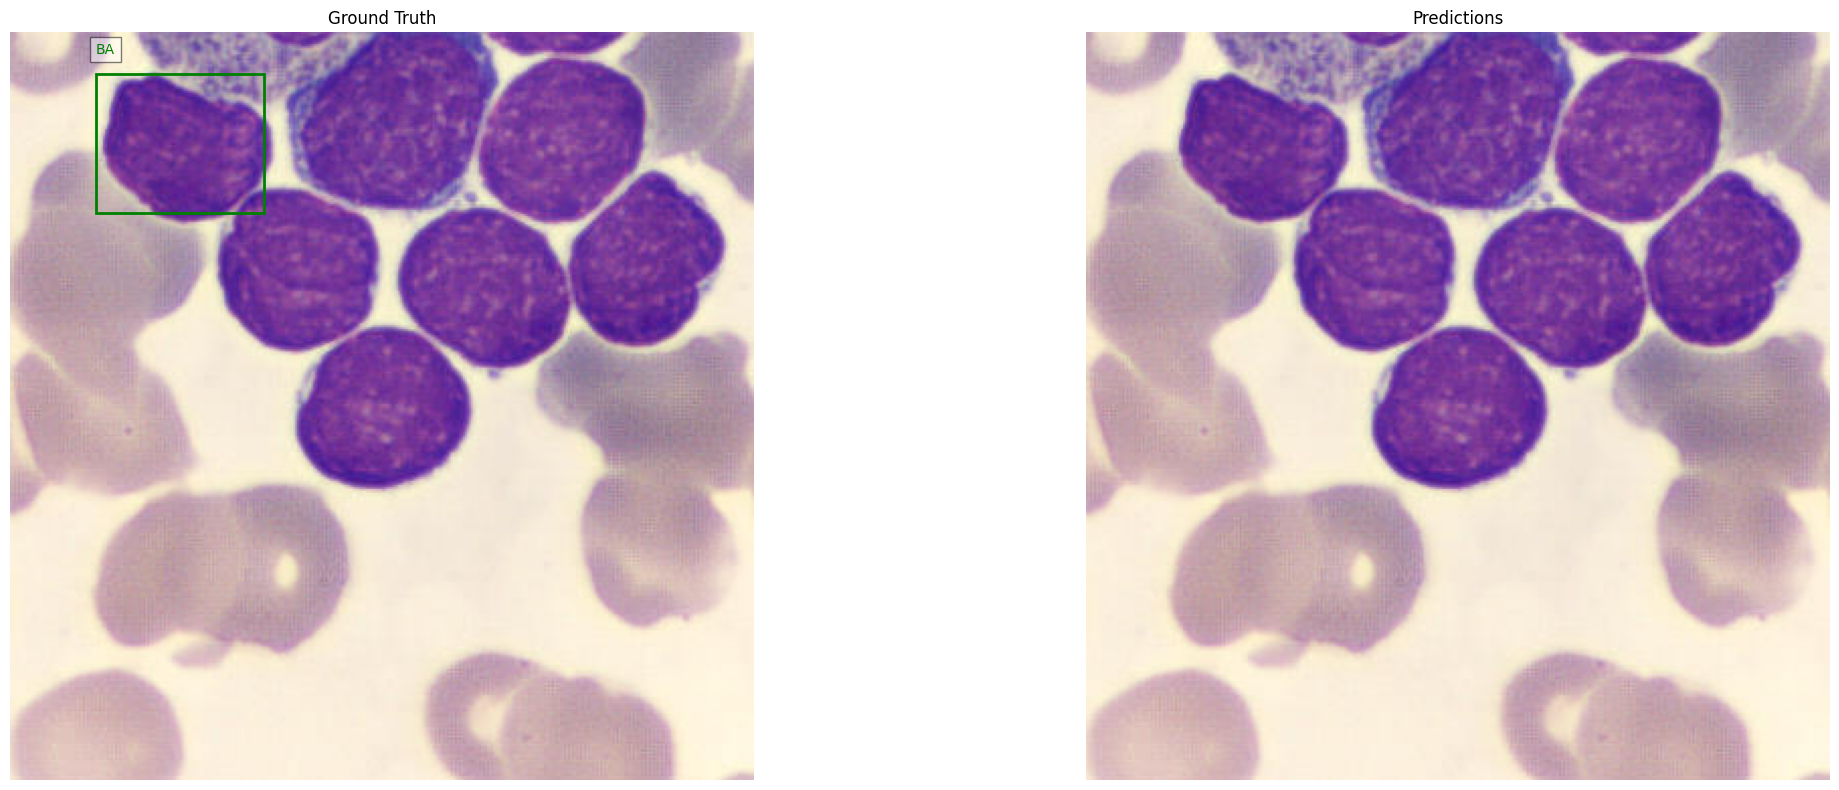


image 1/1 /content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/images/4f5851a4-7.jpg: 640x640 1 LyB, 2 BAs, 15.8ms
Speed: 3.8ms preprocess, 15.8ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)


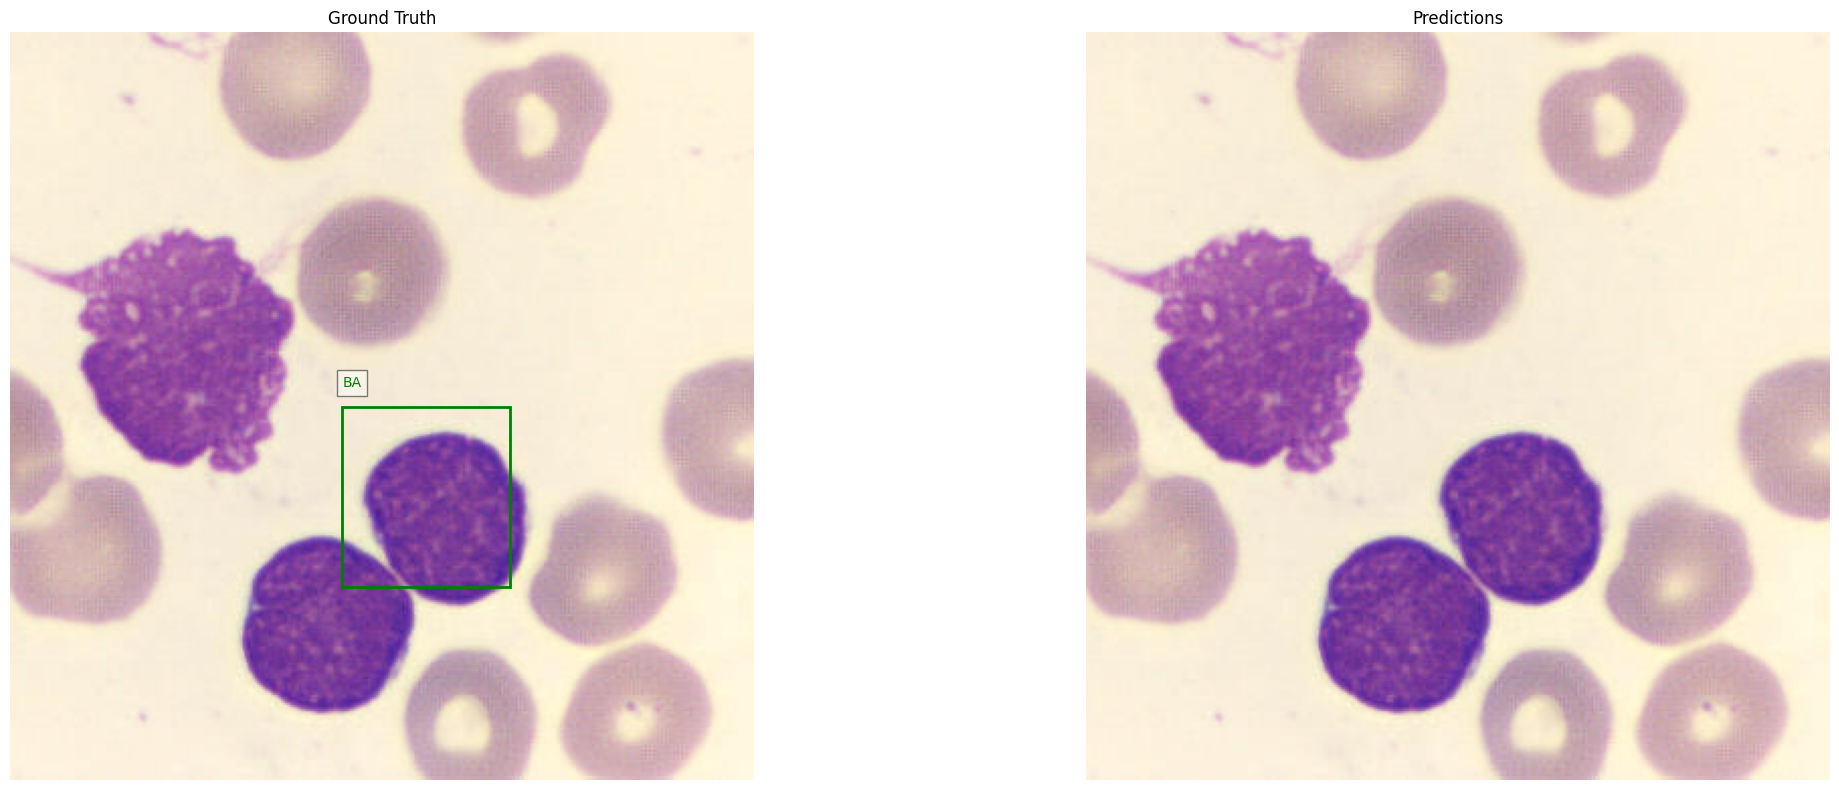


image 1/1 /content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/images/516fcdde-8.jpg: 640x640 2 Thrombs, 14.7ms
Speed: 3.9ms preprocess, 14.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)


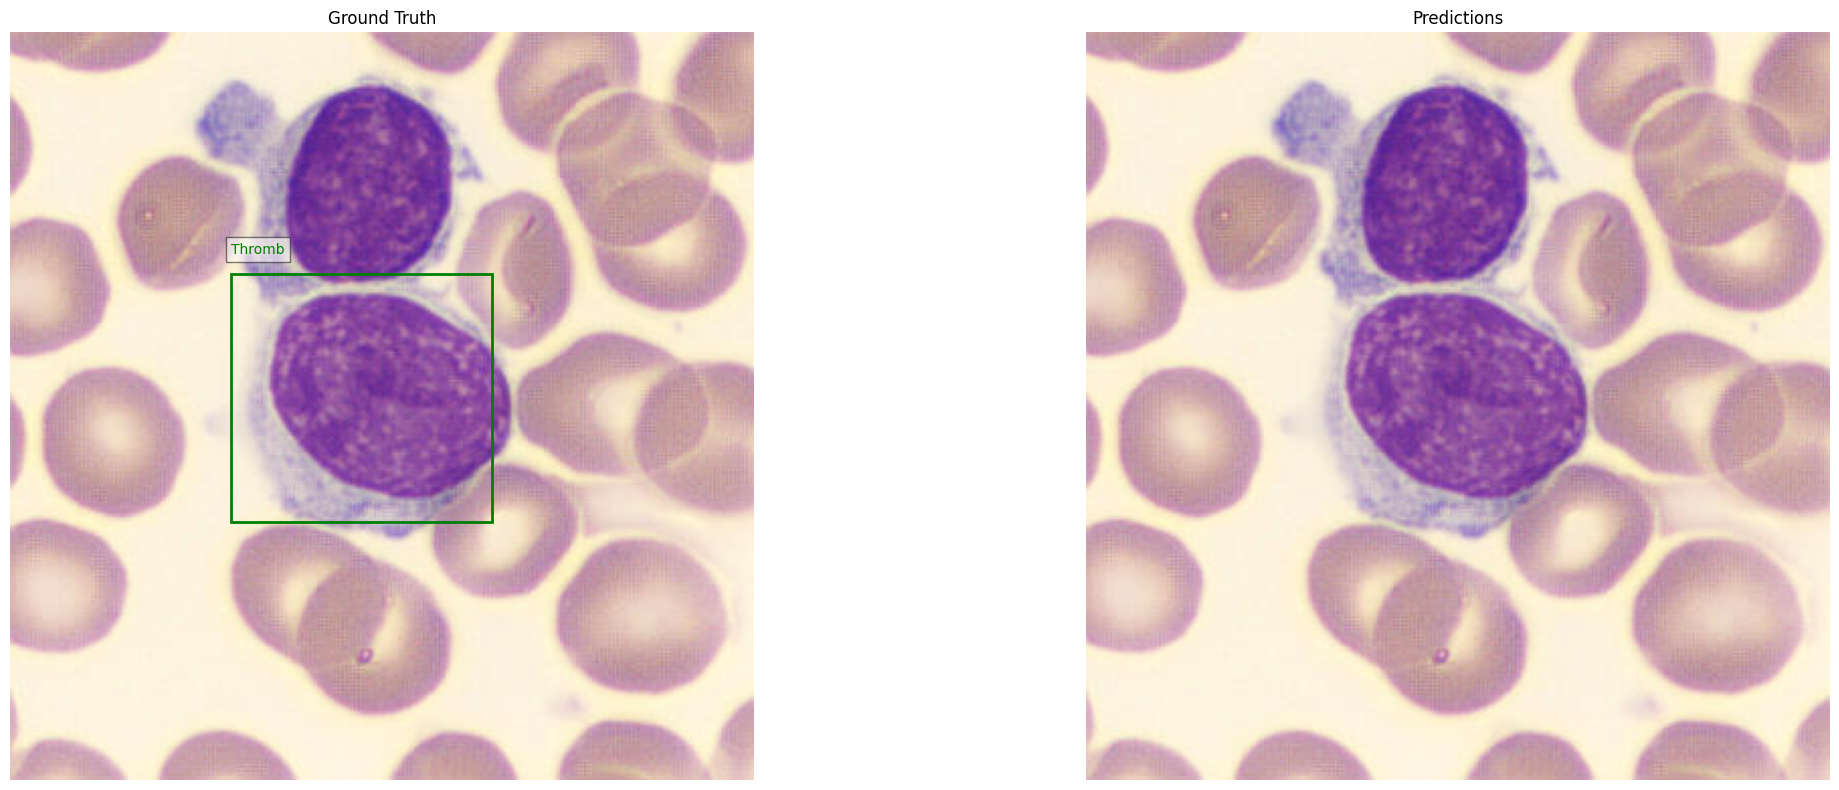

In [13]:
import os
import random
import yaml
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Visualization Function
def visualize_sample(image_path, ground_truth, predictions, class_names):
    """Visualize ground truth and predictions on a single image."""
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to read image at {image_path}")
        return

    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    fig, ax = plt.subplots(1, 2, figsize=(24, 8))

    # Ground Truth Image
    ax[0].imshow(image)
    ax[0].set_title("Ground Truth")
    for gt in ground_truth:
        class_id, x_center, y_center, width, height = gt
        x1 = (x_center - width / 2) * image.shape[1]
        y1 = (y_center - height / 2) * image.shape[0]
        box_width = width * image.shape[1]
        box_height = height * image.shape[0]
        rect = patches.Rectangle(
            (x1, y1), box_width, box_height,
            linewidth=2, edgecolor='green', facecolor='none'
        )
        ax[0].add_patch(rect)
        ax[0].text(
            x1, y1 - 10, f"{class_names[int(class_id)]}",
            color='green', fontsize=10, bbox=dict(facecolor='white', alpha=0.5)
        )

    # Predictions Image
    ax[1].imshow(image)
    ax[1].set_title("Predictions")
    for pred in predictions:
        if len(pred) >= 6:  # Ensure correct number of values in prediction
            class_id, confidence, x_center, y_center, width, height = pred[:50]
            x1 = (x_center - width / 2) * image.shape[1]
            y1 = (y_center - height / 2) * image.shape[0]
            box_width = width * image.shape[1]
            box_height = height * image.shape[0]
            rect = patches.Rectangle(
                (x1, y1), box_width, box_height,
                linewidth=2, edgecolor='red', facecolor='none'
            )
            ax[1].add_patch(rect)
            ax[1].text(
                x1, y1 - 10, f"{class_names[int(class_id)]} ({confidence:.2f})",
                color='red', fontsize=10, bbox=dict(facecolor='white', alpha=0.5)
            )

    for a in ax:
        a.axis('off')
    plt.tight_layout()
    plt.show()


# Load class names
with open('/content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/yolov5/data.yaml', 'r') as yaml_file:
    dataset_config = yaml.safe_load(yaml_file)
    class_names = dataset_config['names']
test_images_dir = '/content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/images'
# Get 6 random sample images from the test directory
sample_images = [img for img in os.listdir(test_images_dir) if img.endswith('.jpg')]
random_samples = random.sample(sample_images, 6)

for random_sample in random_samples:
    sample_image_path = os.path.join(test_images_dir, random_sample)

    # Ground truth: Load from corresponding label file
    gt_label_file = sample_image_path.replace('images', 'labels').replace('.jpg', '.txt')
    with open(gt_label_file, 'r') as f:
        ground_truth = [list(map(float, line.strip().split())) for line in f.readlines()]

    # Predictions: Run inference on the sample image
    results = model.predict(source=sample_image_path, conf=0.1)  # Lower confidence threshold
    if results and hasattr(results[0], 'boxes') and results[0].boxes is not None:
        predictions = results[0].boxes.xywhn.cpu().numpy().tolist()  # Normalized bbox format
    else:
        predictions = []

    # Visualize the image
    visualize_sample(sample_image_path, ground_truth, predictions, class_names)



image 1/1 /content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/images/36b11457-2.jpg: 640x640 1 PNN, 17.5ms
Speed: 3.9ms preprocess, 17.5ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Image: 36b11457-2.jpg, Predictions: [[3, 0.9786670207977295, 0.47670236229896545, 0.46690288186073303, 0.22781886160373688, 0.29511165618896484]]


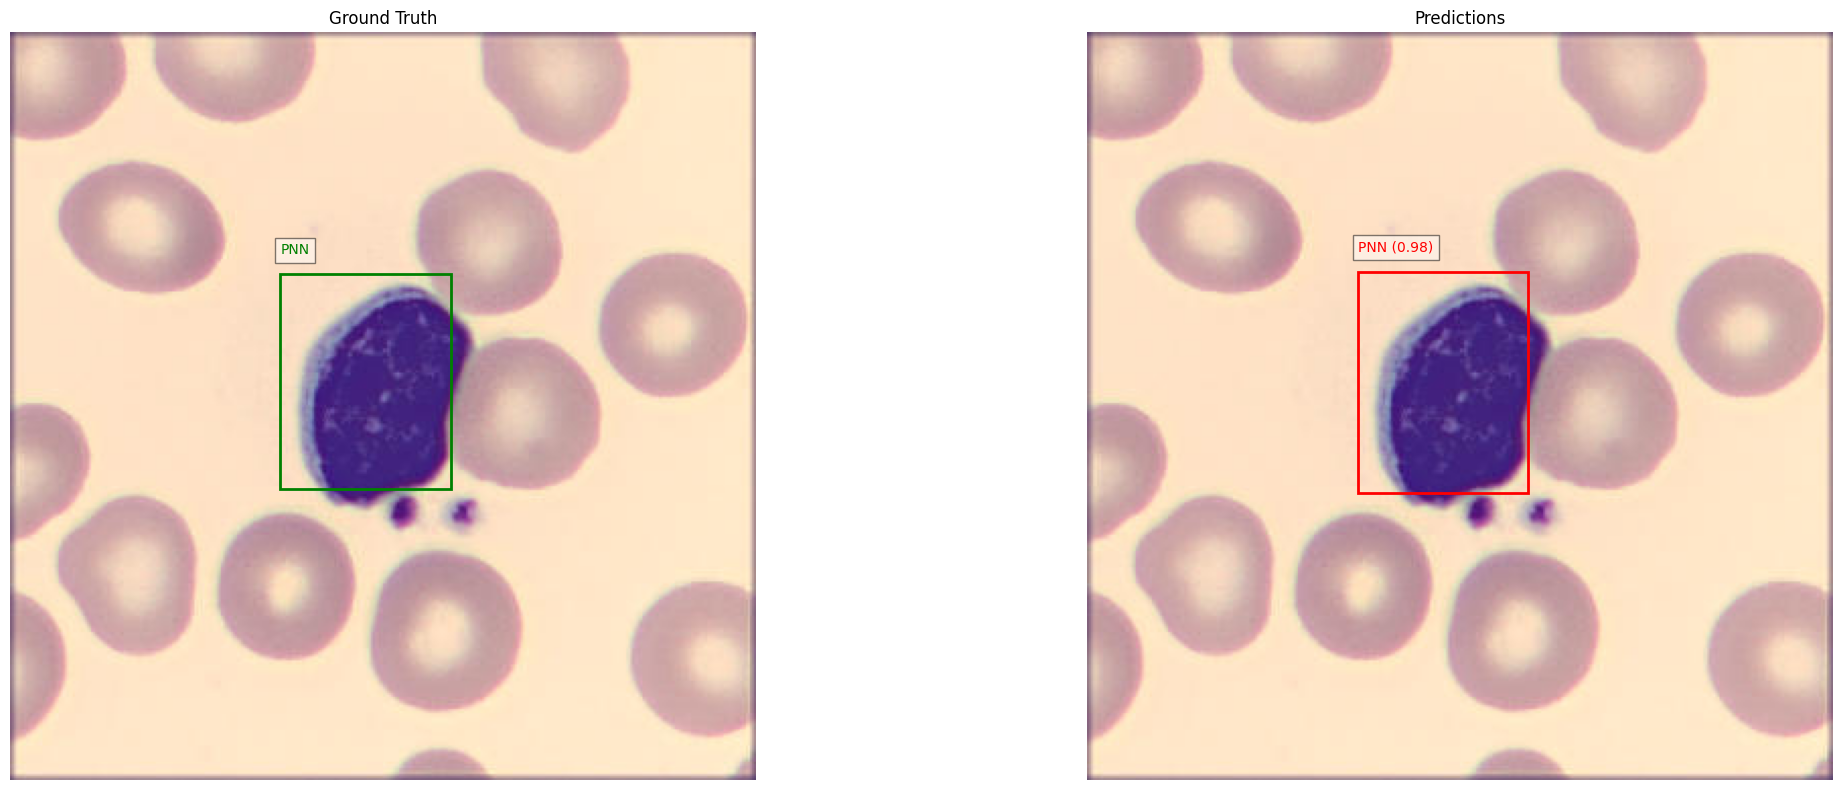


image 1/1 /content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/images/9d5dc230-c.jpg: 640x640 1 PNN, 14.4ms
Speed: 4.0ms preprocess, 14.4ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Image: 9d5dc230-c.jpg, Predictions: [[3, 0.9531917572021484, 0.48393964767456055, 0.48002180457115173, 0.30512353777885437, 0.30102938413619995]]


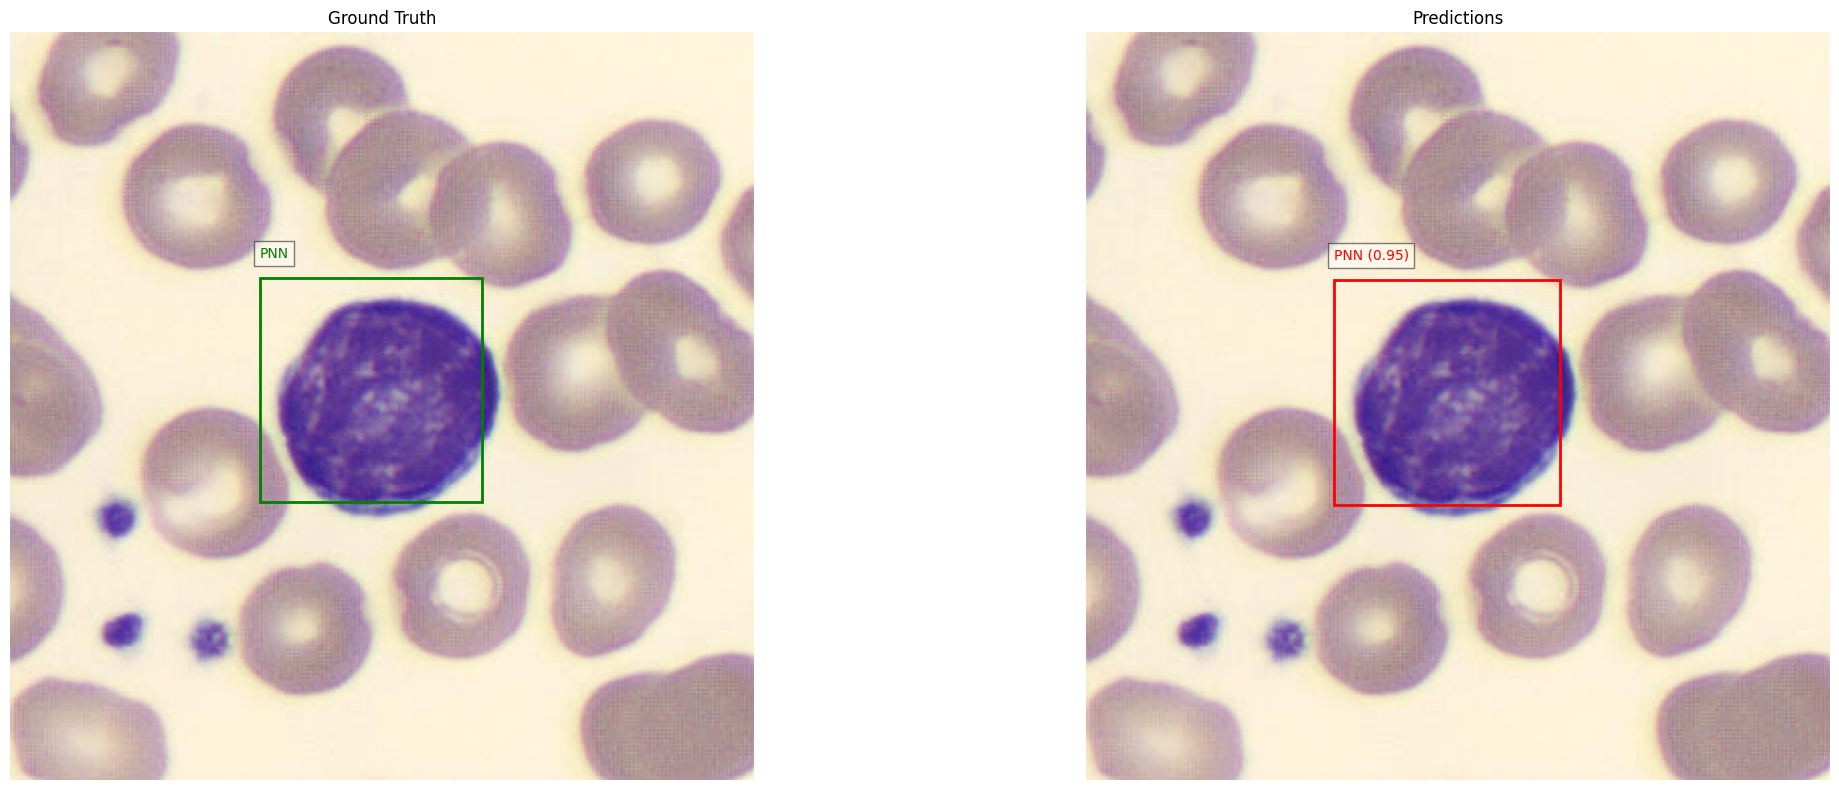


image 1/1 /content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/images/54796fa0-5.jpg: 640x640 1 SS, 20.0ms
Speed: 3.9ms preprocess, 20.0ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 640)
Image: 54796fa0-5.jpg, Predictions: [[2, 0.9022836685180664, 0.4746468663215637, 0.48759230971336365, 0.46829408407211304, 0.4524608850479126]]


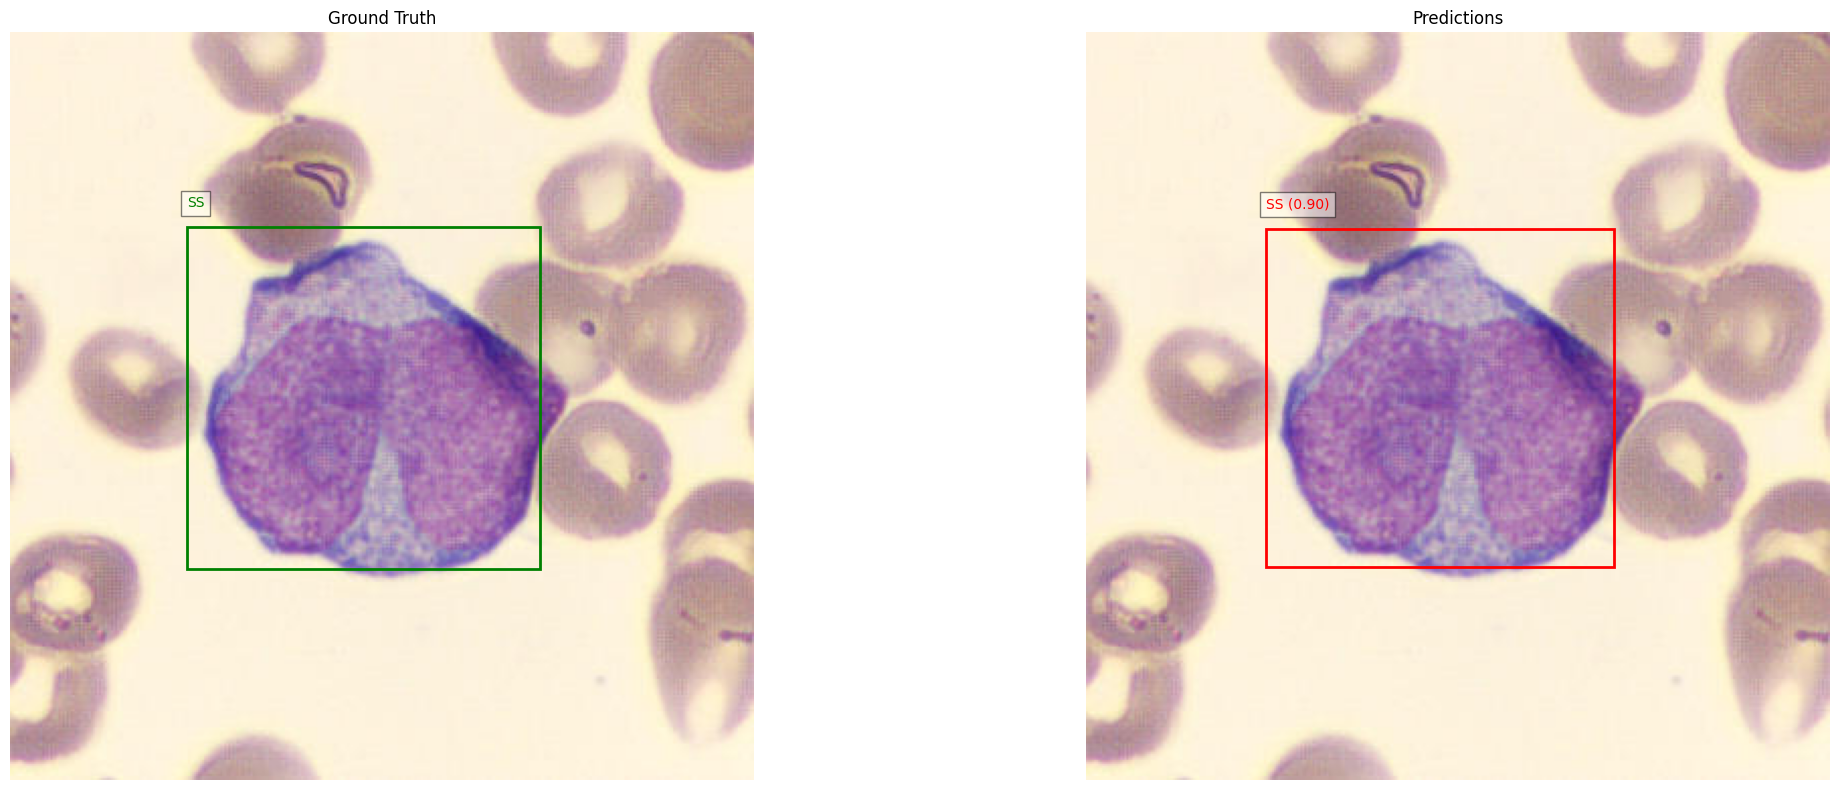


image 1/1 /content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/images/0e2826b8-e.jpg: 640x640 8 BAs, 17.7ms
Speed: 3.8ms preprocess, 17.7ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)
Image: 0e2826b8-e.jpg, Predictions: [[12, 0.9226475358009338, 0.4740355610847473, 0.479559987783432, 0.23960869014263153, 0.22155073285102844], [12, 0.8759391903877258, 0.3599354028701782, 0.2977275550365448, 0.21208898723125458, 0.21882489323616028], [12, 0.5554067492485046, 0.21012184023857117, 0.13377957046031952, 0.22805330157279968, 0.19661608338356018], [12, 0.5501828193664551, 0.8356598615646362, 0.2815329432487488, 0.20637603104114532, 0.23022982478141785], [12, 0.5275493860244751, 0.48667436838150024, 0.1119668036699295, 0.2713867425918579, 0.22295543551445007], [12, 0.49221110343933105, 0.6140545606613159, 0.32137688994407654, 0.2443239390850067, 0.22595499455928802], [12, 0.3874971568584442, 0.7375428080558777, 0.12600088119506836, 0.

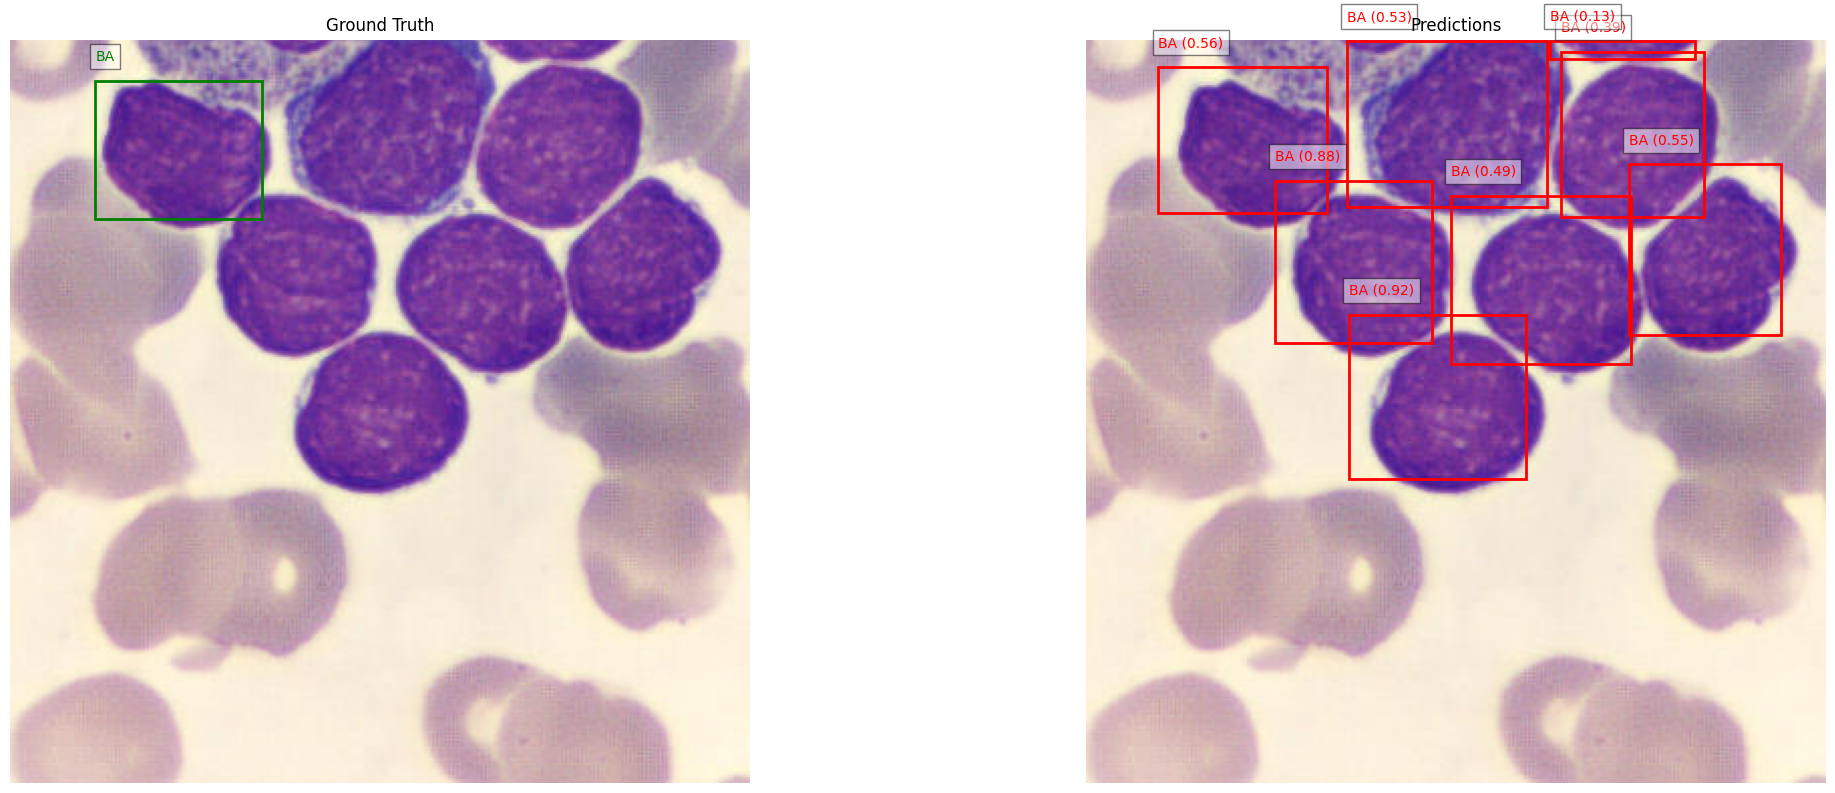


image 1/1 /content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/images/4f5851a4-7.jpg: 640x640 1 LyB, 2 BAs, 16.0ms
Speed: 3.7ms preprocess, 16.0ms inference, 7.6ms postprocess per image at shape (1, 3, 640, 640)
Image: 4f5851a4-7.jpg, Predictions: [[12, 0.9017319679260254, 0.5591306090354919, 0.6257433891296387, 0.22539573907852173, 0.2360999882221222], [12, 0.8643579483032227, 0.40060845017433167, 0.7653423547744751, 0.22999946773052216, 0.23549441993236542], [1, 0.3709937632083893, 0.2104550302028656, 0.4038805365562439, 0.29797226190567017, 0.3212597072124481]]


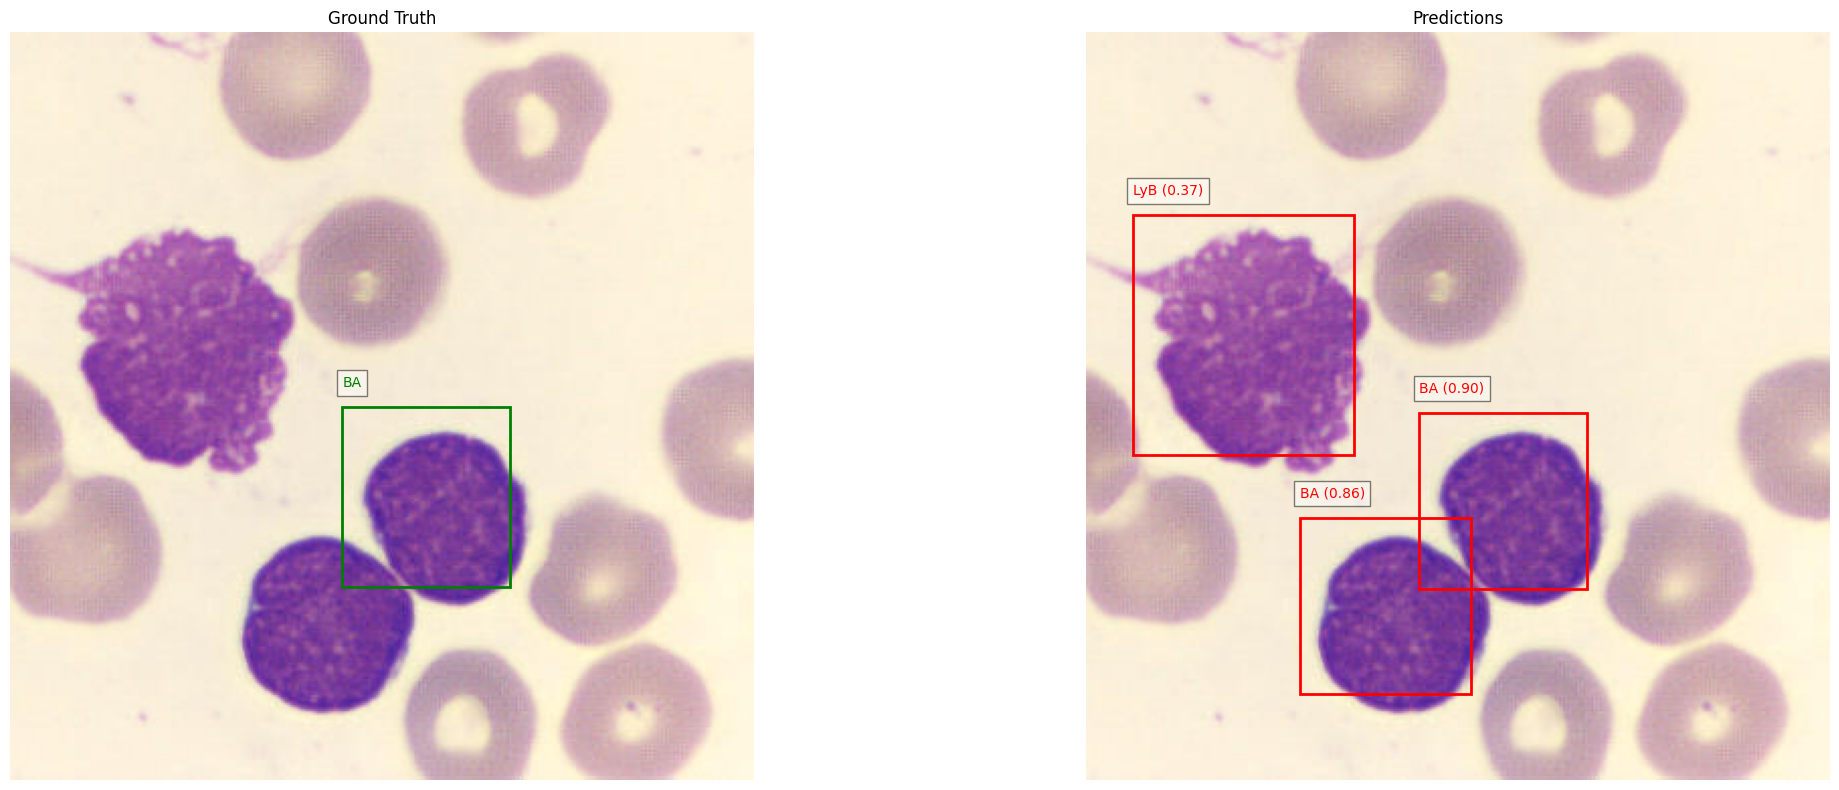


image 1/1 /content/drive/MyDrive/Hematology_data/Final_data_preprocessed/yolo_annotations_format/test/images/516fcdde-8.jpg: 640x640 2 Thrombs, 14.3ms
Speed: 4.1ms preprocess, 14.3ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)
Image: 516fcdde-8.jpg, Predictions: [[22, 0.926953136920929, 0.47229623794555664, 0.4875016510486603, 0.35177886486053467, 0.3323642611503601], [22, 0.9095709323883057, 0.4494263231754303, 0.19116128981113434, 0.2757226824760437, 0.2921184003353119]]


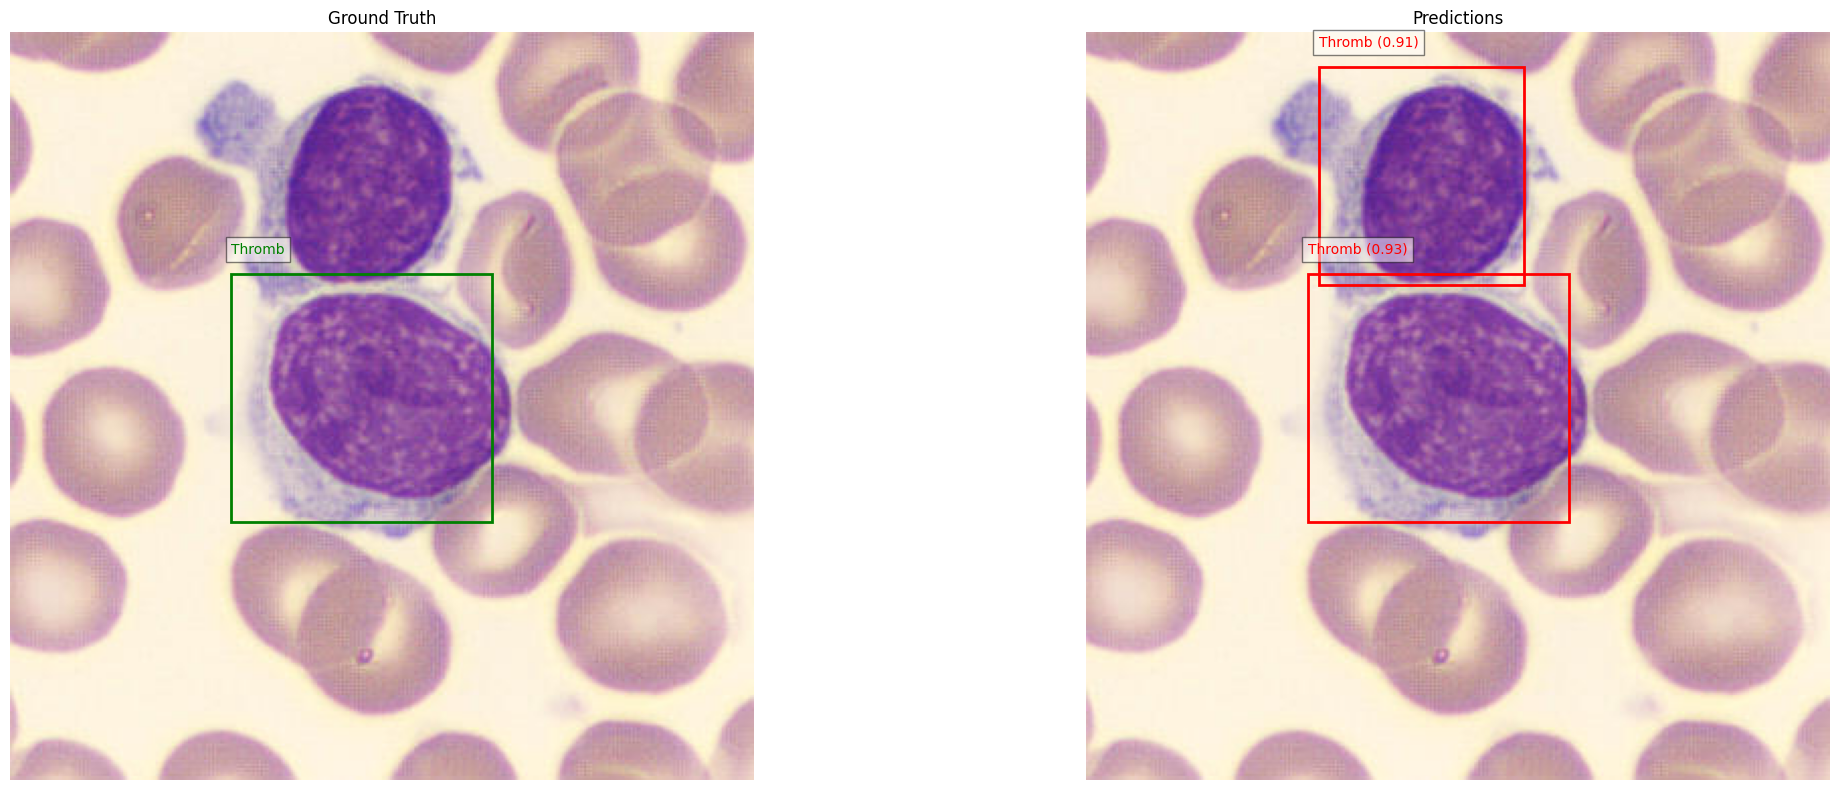

In [14]:
for random_sample in random_samples:
    sample_image_path = os.path.join(test_images_dir, random_sample)

    # Ground truth: Load from corresponding label file
    gt_label_file = sample_image_path.replace('images', 'labels').replace('.jpg', '.txt')
    with open(gt_label_file, 'r') as f:
        ground_truth = [list(map(float, line.strip().split())) for line in f.readlines()]

    # Predictions: Run inference on the sample image
    results = model.predict(source=sample_image_path, conf=0.1)  # Lower confidence threshold to capture more predictions
    if results and hasattr(results[0], 'boxes') and results[0].boxes is not None:
        boxes = results[0].boxes
        class_ids = boxes.cls.cpu().numpy().astype(int).tolist()
        confidences = boxes.conf.cpu().numpy().tolist()
        bboxes = boxes.xywhn.cpu().numpy().tolist()
        predictions = [[class_ids[i], confidences[i]] + bboxes[i] for i in range(len(bboxes))]
        print(f"Image: {random_sample}, Predictions: {predictions}")  # Debug statement
    else:
        predictions = []
        print(f"Image: {random_sample}, No predictions found.")  # Debug statement

    # Visualize the image
    visualize_sample(sample_image_path, ground_truth, predictions, class_names)


In [16]:
!zip -r /content/runs.zip /content

NotImplementedError: A UTF-8 locale is required. Got ANSI_X3.4-1968

In [ ]:
# post_training_files_path = '/content/runs/detect/train3'

# # Construct the path to the best model weights file using os.path.join
# best_model_path = os.path.join(post_training_files_path, 'weights/best.pt')

# # Load the best model weights into the YOLO model
# best_model = YOLO(best_model_path)

# # Validate the best model using the validation set with default parameters
# metrics = best_model.val(split='val')

In [ ]:
# metrics_df = metrics.rename(columns={'some_column': 'Metric Value'})
# metrics_df